# TP 2 - Séance 2
## Filtrage fréquentiel 2D

Équipe #0
- Nom, Prénom (Matricule)
- Nom, Prénom (Matricule)

In [1]:
# Importe les modules qui seront utilisé dans le laboratoire.
from typing import Optional
import numpy as np
from scipy.ndimage import convolve
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (18, 8)

# Exercice III : FFT de signaux théoriques 2D

On étudie le signal S1: $S_1(x,y)=\cos(2\pi\,(x f_x + y f_y))$ paramétré par les fréquences $f_x$ et $f_y$.

On vous fourni les fonctions ```S1(fx,fy)``` qui calcule le signal avec un échantillonage $F_e=100 px/mm$, et ```plot_fft2(fft_signal)``` qui prend en paramètre une transformée de Fourier et affiche le spectre associé.

In [2]:
def plot_fft2(
    fft_signal: np.ndarray,
    Fe: Optional[float] = None,
    grid: bool = True,
    logscale: bool = False,
    ax: Optional[matplotlib.axes.Axes] = None,
) -> None:
    """Trace le spectre d'un signal à partir de sa transformée de Fourier.
    
    Args:
        fft_signal (np.ndarray): Transformée de Fourier du signal à afficher (array 2D complexe).
        Fe (float, optionnel): Fréquence d'échantillonage du signal. La valeur par défaut est None.
        grid (bool, optionnel): Si vrai, affiche une grille sur le spectre. La valeur par défaut est True.
        logscale (bool, optionnel): Si vrai, les intensités du spectre sont affichés en échelle logarithmique. La
            valeur par défaut est False
        ax (matplotlib.axes.Axes, optionnel): Si fourni, le spectre sera tracer dans ce subplot. La valeur par défaut
            est None.
    """
    # Si aucun système d'axes est fourni on en créé un.
    if ax is None:
        fig, ax = plt.subplots()

    # On calcule les bornes des abscisses et des ordonnées à partir de Fe.
    H, W = fft_signal.shape
    if Fe is not None:
        ymax = (H - (0 if H % 2 else 1)) / (2 * H) * Fe
        xmax = (W - (0 if W % 2 else 1)) / (2 * W) * Fe
        extent = (-Fe / 2, xmax, ymax, -Fe / 2)
    else:
        extent = (-W // 2, W // 2 + (W % 2), H // 2, -H // 2 - (H % 2))

    if grid:
        # Si grid est vrai, on affiche la grille
        ax.grid(color="#bbb", linestyle="dotted")
        unit = " (en $mm^{-1}$)" if Fe is not None else ""
        ax.set_xlabel("U" + unit)
        ax.set_ylabel("V" + unit)
    else:
        # Sinon on désactive les axes
        ax.axis("off")

    # On calcule le spectre: soit le module de la transformée de Fourier.
    fft_displayed = np.abs(fft_signal)

    if not logscale:
        # Si logscale est faux on affiche le spectre avec une colorbar
        graph = ax.imshow(fft_displayed, cmap="inferno", extent=extent)
        plt.colorbar(graph, ax=ax, fraction=0.0467, pad=0.02)
    else:
        # Sinon on nivelle les intensités trop élevés (0.1% des intensités les plus fortes)
        fft_displayed = np.clip(fft_displayed, 0, np.percentile(fft_displayed, 99.9))
        # et on affiche le spectre en intensités logarithmiques
        fft_displayed = np.log(1 + fft_displayed)
        graph = ax.imshow(fft_displayed, cmap="inferno", extent=extent, vmin=0)


def S1(fx: float, fy: float) -> np.ndarray:
    """Génère le signal S1 sur [-1, 1] x [-1, 1] avec une fréquence d'échantillonnage de 100 px/mm.

    Args:
        fx (float): Fréquence du signal en x.
        fy (float): Fréquence du signal en y.

    Returns:
        np.ndarray: Le signal S1.
    """
    y = np.arange(-1, 1, 1 / 100)
    x = np.arange(-1, 1, 1 / 100)
    # On définit une grille de coordonnées x et y.
    x, y = np.meshgrid(x, y)

    # On calcule le signal pour chaque point de cette grille, c'est-à-dire pour chaque pixel de l'image.
    return np.cos(2 * np.pi * (x * fx + y * fy))

**1a.** Implémentez la fonction `compute_fft2(signal)` qui prend en argument une image et calcule sa transformée de Fourier (normalisée et avec son origine centrée).  

**1b.** En prenant $f_x=20mm^{-1}$ et $f_y=0$. Affichez le signal $S_1(x,y)$ et son spectre à l'aide de `plot_fft2()`. Vérifier la position des pics et leur amplitude (donnée par la colorbar).

_(Pour gagner du temps dans la suite de l'exercice, on conseille d'encapsuler le code d'affichage d'un signal et de son spectre dans une méthode.)_

In [3]:
def compute_fft2(signal):
    # La transformée de Fourier d'une image est calculée par np.fft.fft2(img). 
    # Comme np.fft.fft() la transformée de Fourier est renvoyé entre 0<=f<Fe,
    # utilisez np.fft.fftshift pour la centrer (fréquence entre -Fe/2<=f<Fe/2).
    # return ...
    
    signal_fft = np.fft.fft2(signal) #, norm="forward")
    
    signal_fft_shift = np.fft.fftshift(signal_fft, axes = (0,))
    
#     signal_fft_shift = np.fft.fftshift(signal_fft, axes = (1,))
    
    
    # IL FAUT NORMALISER : forward pour fft2, backward pour ifft2
    # sinon : diviser par nombre de donnees (???)
    
    
    return signal_fft_shift

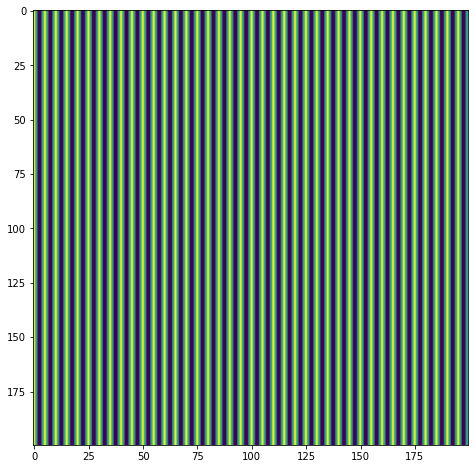

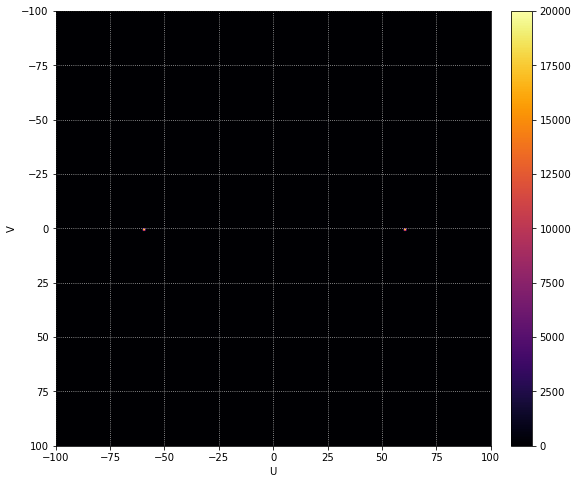

In [4]:
fx = 20
fy = 0
signal = S1(fx, fy)
# signal_fft = np.fft.fft2(signal)
# print(signal_fft.shape, signal_fft.dtype )
# print(signal.shape, signal.dtype )

# plt.plot(signal)
plt.imshow(signal)
# plot_fft2(signal_fft)

# signal_fft_shift = np.fft.fftshift(signal_fft)

signal_fft_shift = compute_fft2(signal)
plot_fft2(signal_fft_shift)



**2.** Affichez $S_1$ et son spectre pour $f_x=0$, $f_y=20mm^{-1}$ puis pour $f_x=20mm^{-1}$, $f_y=20mm^{-1}$.   
Quel est l'effet d'une rotation de l'image sur son spectre?

<Figure size 1296x576 with 0 Axes>

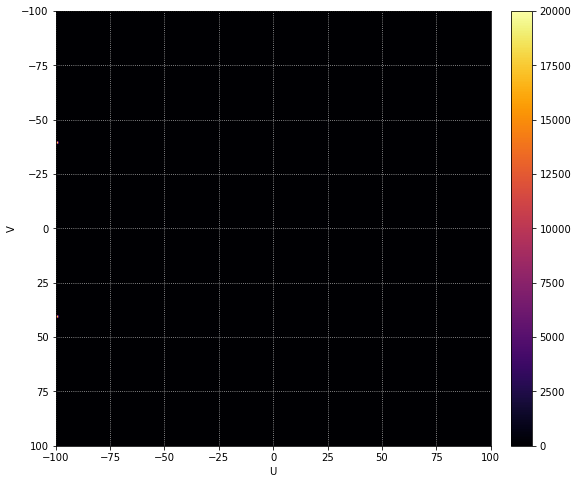

<Figure size 1296x576 with 0 Axes>

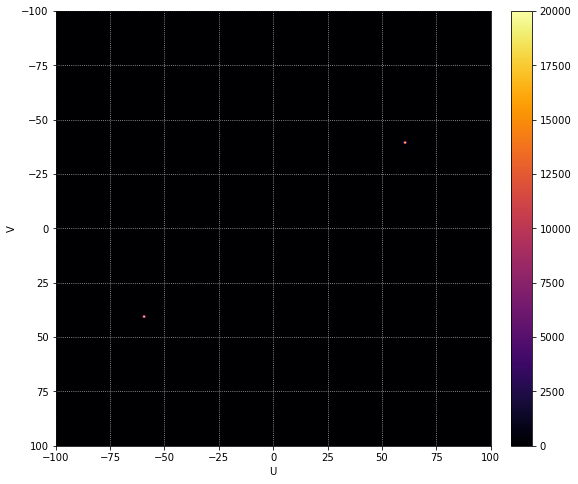

In [5]:
fx = 0
fy = 20
signal2 = S1(fx, fy)
signal_fft_shift_2 = compute_fft2(signal2)
plt.figure()
plot_fft2(signal_fft_shift_2)

fx = 20
fy = 20
signal3 = S1(fx, fy)
signal_fft_shift_3 = compute_fft2(signal3)
plt.figure()
plot_fft2(signal_fft_shift_3)

La prochaine question étudie le signal: $S_2(x,y) = cos(2\pi f r)$ où $r=\sqrt{x^2+y^2}$.

**3.** En vous inspirant de l'implémentation de ```S1(fx, fy)```, définissez ```S2(f)``` (pour mieux comprendre voir la doc de [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)).  

Affichez le signal et son spectre pour $f=20mm^{-1}$ et pour $f=40mm^{-1}$. Quel est l'effet d'un rétrécissement de l'image sur son spectre?   

Affichez le signal et le spectre pour $f=100mm^{-1}$. Expliquez l'allure du spectre et les aberrations visibles sur le signal.

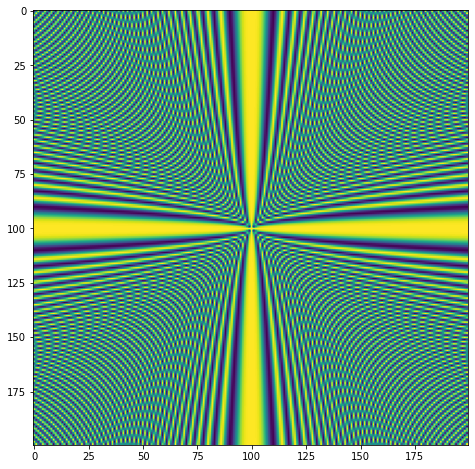

<Figure size 1296x576 with 0 Axes>

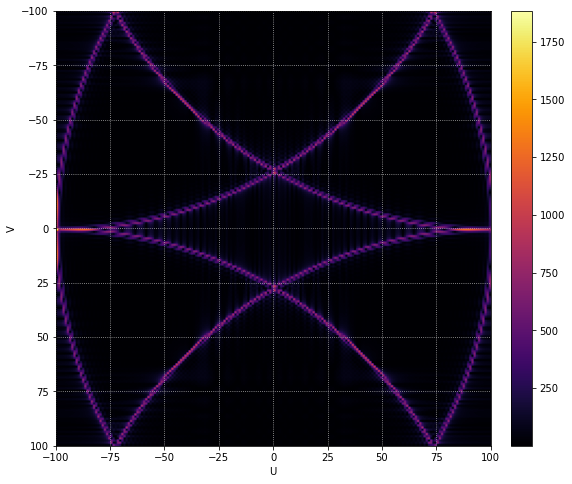

In [6]:
def S2(f: float) -> np.ndarray:
    # Génère le signal S1 sur [-1, 1] x [-1, 1] avec une fréquence d'échantillonnage de 100 px/mm
    y = np.arange(-1, 1, 1 / 100)
    x = np.arange(-1, 1, 1 / 100)
    
    # On définit une grille de coordonnées x et y.
    x, y = np.meshgrid(x, y)
    
    r = np.sqrt(x**2 + y**2) # ??
      
    return np.cos(2*np.pi*f*r)


# f = 100 : introduit aliasing 
f = 100
s2 = S2(f)
plt.figure()
plt.imshow(s2)
s2_fft_shift = compute_fft2(s2)
plt.figure()
plot_fft2(s2_fft_shift)


# def S1(fx: float, fy: float) -> np.ndarray:
#     """Génère le signal S1 sur [-1, 1] x [-1, 1] avec une fréquence d'échantillonnage de 100 px/mm.

#     Args:
#         fx (float): Fréquence du signal en x.
#         fy (float): Fréquence du signal en y.

#     Returns:
#         np.ndarray: Le signal S1.
#     """
#     y = np.arange(-1, 1, 1 / 100)
#     x = np.arange(-1, 1, 1 / 100)
#     # On définit une grille de coordonnées x et y.
#     x, y = np.meshgrid(x, y)

#     # On calcule le signal pour chaque point de cette grille, c'est-à-dire pour chaque pixel de l'image.
#     return np.cos(2 * np.pi * (x * fx + y * fy))

# Exercice IV : Filtrage spectral

Cet exercice étudie une image angiographique du réseau coronaire: c'est-à-dire une radiographie des artères qui alimentent le coeur dans lesquelles est injecté un agent de contraste.

Tout d'abord, on souhaite définir une fonction de création de gaussienne.    
On rappelle la formule de la gaussienne en 2D d'écart-type $\sigma$ et de centre $(x_0, y_0)$: $G(x,y) = \exp\left(\dfrac{-r^2}{2 \sigma^2}\right)$ avec $r=\sqrt{(x-x_0)^2+(y-y_0)^2}$.

**1a.** Implémenter la fonction `gaussian(std, size, x0=0, y0=0)` qui renvoie une matrice de taille `size` contenant les valeurs d'une gaussienne d'écart-type `std` et centrée sur (`x0`, `y0`) avec le point central comme origine: (0,0).

**1b.** Calculez une gaussienne centrée, d'écart-type 7 dans une matrice 300x300. Affichez son image et son spectre.

(300, 300)
(300,)


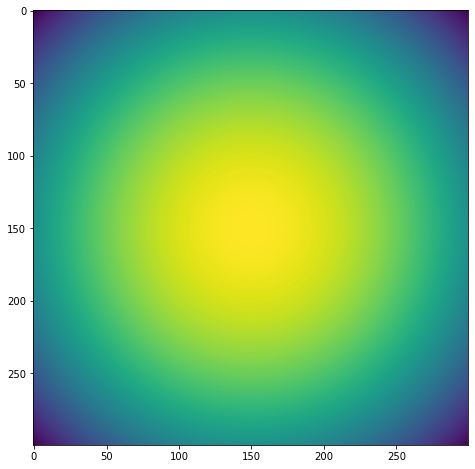

In [7]:
def gaussian(std, size, x0=0, y0=0) -> np.ndarray: # size ???
    # Génère le signal S1 sur [-1, 1] x [-1, 1] avec une fréquence d'échantillonnage de 100 px/mm
    y = np.arange(-1, 1, 1 / (size/2))  #??? comment definir vecteur??
    x = np.arange(-1, 1, 1 / (size/2))
    
    # On définit une grille de coordonnées x et y.
    x, y = np.meshgrid(x, y)
    
    r = np.sqrt((x-x0)**2 + (y-y0)**2) 
    G = np.exp(-(r**2)/(2*(std**2)))    
    
    return G

std = 7
size = 300
x0 = 0
y0 = 0
G7 = gaussian(7, size, x0, y0)
print(G7.shape)
plt.imshow(G7)

y = np.arange(0, 1, 1 / size)  #??? comment definir vecteur??
print(y.shape)

**2.** Chargez l'image `angiographie.png`. Affichez l'image et son spectre.   
Identifiez sur le spectre les raies qui sont responsables des rayures diagonales sur l'angiographie (Donnez les coordonnées des points concernés). 

_Pour améliorer sa lisibilité du spectre, activez l'option `logscale=True`. Cette option sera laissée active dans les prochaines questions pour l'affichage de tous les spectres issus de l'image._

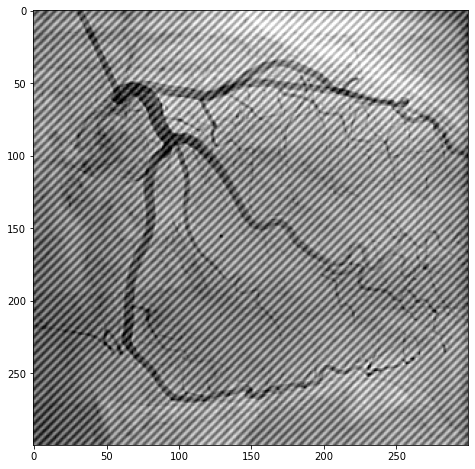

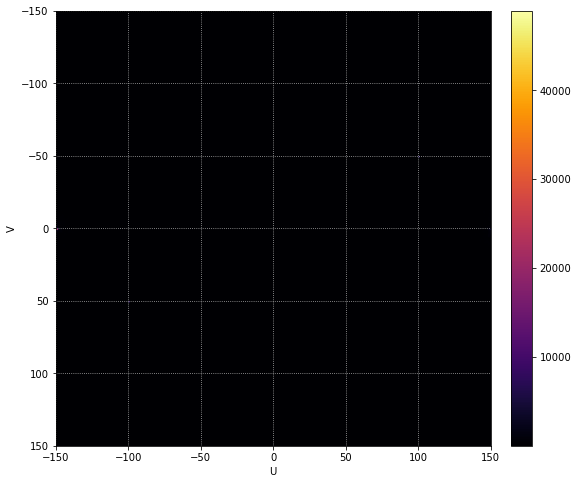

In [11]:
img_angio = (plt.imread('angiographie.png'))

plt.imshow(img_angio, cmap='gray')
img_angio_fft = compute_fft2(img_angio)
plot_fft2(img_angio_fft)
# plt.figure()
# plt.imshow(img_radio_thorax, cmap='gray')

**3.** À l'aide de la fonction ``gaussian()``, concevez un masque pour filtrer ces raies directement dans le domaine de Fourier. (On pourra prendre un écart type de 3 pixels pour les gaussiennes.) Appliquez le masque à la transformée de fourier de l'image.   
Affichez le masque et le spectre filtré.

(300, 300)


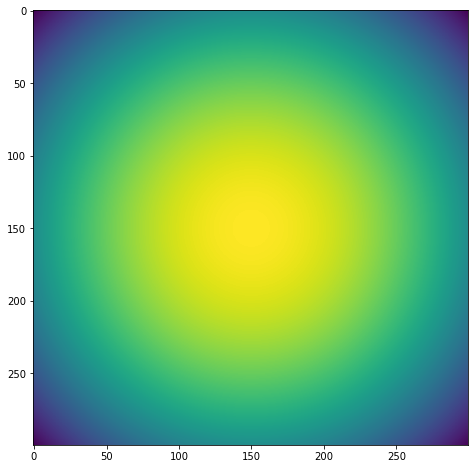

In [14]:
std = 3
size = 300
x0 = 0
y0 = 0
angio_gaussian_mask = gaussian(3, size, x0, y0)
print(angio_gaussian_mask.shape)
plt.imshow(angio_gaussian_mask)

# mask function


**4.** Implémenter la fonction `compute_ifft2(fft_signal)` qui prend en argument la transformée de Fourier d'une image et renvoie l'image reconstituée par transformée de Fourier inverse. Reconstituez et affichez l'angiographie nettoyée de ses rayures diagonales.

Pour la suite de l'exercice on travaillera sur l'angiographie nettoyée ou sur son spectre. Sa transformée de Fourier sera notée $T_0$.

In [ ]:
def compute_ifft2(fft_signal):
    # Avant d'être basculée dans le domaine spatiale, les fréquences de la transformée de Fourier du signal 
    # doivent être permutées avec np.fft.ifftshift pour être à nouveau comprises entre 0 <= f < Fe.
    # La transformée de Fourier inverse d'une image est calculée par np.fft.ifft2(img). 
    # return ...

On souhaite appliquer un filtre passe-bas dont la réponse fréquentielle est une gaussienne centrée sur l'origine d'écart-type 20.

**5.** Créez le masque gaussien correspondant, appliquez le à la transformée de Fourier de l'image et reconstituez là. Affichez l'image reconstituée et son spectre. 

On notera $T_{\text{LF}}$ la transformée de Fourier après ce filtrage.

**6.** Calculez l'intensité des fréquences qui ont été retirées du spectre à la question précédente, c'est-à-dire la transformée de Fourier $T_{\text{HF}}$ telle que $T_0 = T_{\text{LF}} + T_{\text{HF}}$.   
Affichez l'image reconstituée et son spectre. Quel est le type de ce filtrage?

**7.** Créez un masque gaussien centré d'écart-type 2.39 pixels, de taille 10x10 et normalisé pour que sa somme soit 1. Convoluez ce masque avec l'image nettoyée à la question 4.   
Affichez l'image filtrée et son spectre.

On rappelle que la transformée de Fourier d'une gaussienne d'écart-type $\sigma_0$ est un gaussienne d'écart-type $\frac{1}{2 \pi \sigma_0}$. Notons aussi que l'écart-type du masque de la question 5 en $\text{px}^{-1}$ est de $\frac{20}{300}$, c'est-à-dire l'écart-type de la gaussienne divisé par le nombre de pixel de la largeur (ou de la hauteur) du spectre. En effet pour une fréquence d'échantillonage de $F_e=1$ px, les bornes du spectre devraient être $-0.5$ et $0.5$ et non $-150$ et $150$.


**8a.** Démontrer l'équivalence entre les filtrages réalisés aux question 5 et 7.

**8b.** Avec quel masque faut-il convoluer l'image nettoyée pour réaliser pour opérer un filtrage passe-haut équivalent à celui de la question 6 mais dans le domaine spatial?